### 1.1 Data Preprocessing (3 Points)
You are required to pre-process given datasets.
Airfare and demand: https://users.stat.ufl.edu/~winner/data/airq402.dat
Wine Quality: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
import pandas as pd
# I compared this Table with other found online, and gave this columns names based on other files i found, 
#it might be in- accurate offcourse

column_names = ['CityFrom', 'CityTo', 'AvgFare', 'Distance', 'AvgWeekPsgrs',
                'MktLeadArLn', 'MktShare', 'AvgFareLead',
                'LowPriceArLn', 'MktShareLow', 'Price']

url = 'https://users.stat.ufl.edu/~winner/data/airq402.dat'
flights_df = pd.read_fwf(url, names=column_names)

# Load local Excel files, clean them up by seperating each cell by the ";" and than adding 
# a lable for the wine color, than concat the DF
red = pd.read_csv("winequality-red.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')

# Add type label
red["wine_type"] = "red"
white["wine_type"] = "white"

# Combine datasets
wine_df = pd.concat([red, white], ignore_index=True)

In [2]:
duplicates = wine_df.duplicated()
print("Duplicates:", duplicates.sum())
#keeping it becasue i wasnt instructed to take it out, also it actully might be important data
#becasue it shows the demand for certain wines

Duplicates: 1177


In [3]:
print(wine_df.dtypes)
#check if all are numeric values for the wine DF

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


In [4]:
wine_df["frequency"] = wine_df.groupby(wine_df.columns.tolist())["wine_type"].transform('count')
#I added a frequncy column in order to know how many times a row has apeared. may be usful

In [5]:
# One-hot encode wine_type WITHOUT dropping any column
wine_df = pd.get_dummies(wine_df, columns=["wine_type"], prefix="type", drop_first=False)

In [6]:
wine_df[["type_red", "type_white"]] = wine_df[["type_red", "type_white"]].astype(int)

In [7]:
# Preview the result
print(wine_df[["type_red", "type_white"]].head())

   type_red  type_white
0         1           0
1         1           0
2         1           0
3         1           0
4         1           0


### Explanation: 
I used the One-hot encode soo now instead of wine typr red or white we will have 1 or 0 under the columns "type_red" or "type_white"

#### Now, I will check multicollinearity to see if any of the input features were highly correlated with each other, and whether any needed to be removed (using a 0.9 threshold as a cutoff). Based on the heatmap, no significant multicollinearity was found."

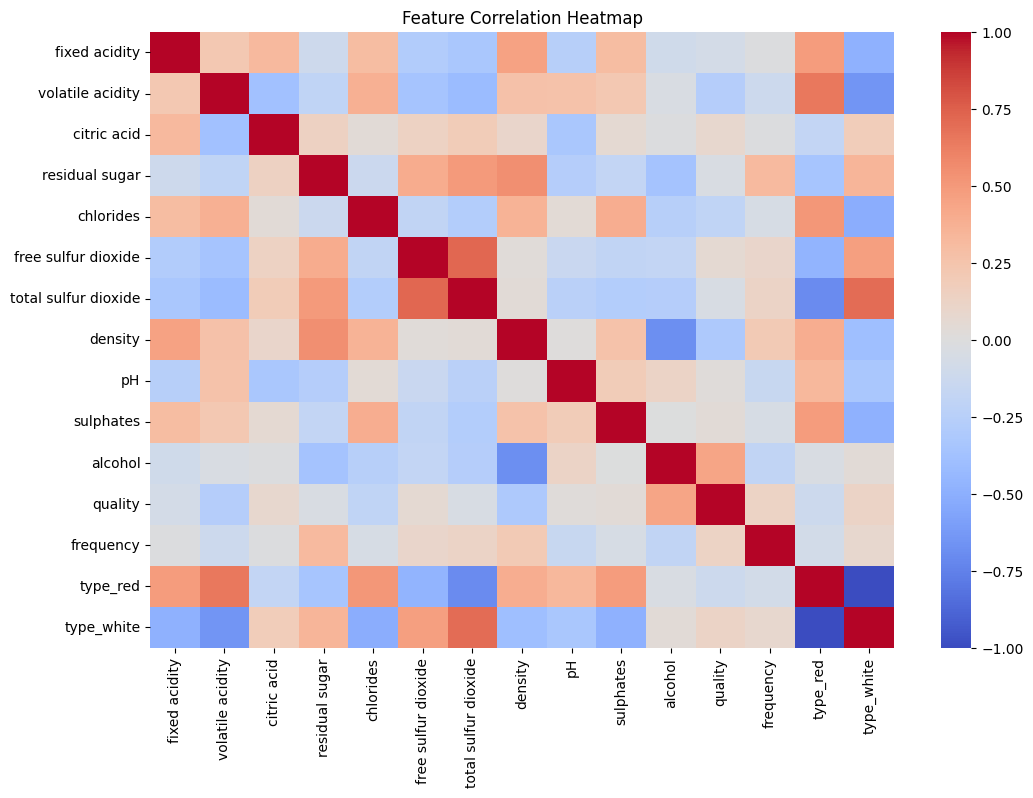

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(wine_df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Check for non numeric values in the flights DF

In [9]:
print(flights_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CityFrom      1000 non-null   object 
 1   CityTo        1000 non-null   object 
 2   AvgFare       1000 non-null   float64
 3   Distance      1000 non-null   int64  
 4   AvgWeekPsgrs  1000 non-null   float64
 5   MktLeadArLn   1000 non-null   object 
 6   MktShare      1000 non-null   float64
 7   AvgFareLead   1000 non-null   float64
 8   LowPriceArLn  1000 non-null   object 
 9   MktShareLow   1000 non-null   float64
 10  Price         1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB
None


In [10]:
flights_df.head()

,CityFrom,CityTo,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


### Preprocessing Steps for flights_df:
We created a shared mapping dictionary to convert all categorical string values (cities and airlines) into numeric codes. Each string column was encoded using this map and added as new columns to the original DataFrame. Finally, we created a clean, numeric-only copy called flights_encoded by dropping the original string columns, making it ready for modeling.

In [11]:
import pandas as pd

# Step 0: Assume flights_df is already loaded

# Step 1: Select the 4 categorical columns to encode
categorical_cols = ['CityFrom', 'CityTo', 'MktLeadArLn', 'LowPriceArLn']

# Step 2: Apply one-hot encoding using pandas
# This creates new binary columns for each category
encoded_df = pd.get_dummies(flights_df[categorical_cols], prefix=categorical_cols)

# Step 3: Drop original categorical columns from the main DataFrame
flights_numeric = flights_df.drop(categorical_cols, axis=1)

# Step 4: Concatenate numeric and encoded columns
flights_encoded = pd.concat([flights_numeric, encoded_df], axis=1)
flights_encoded = flights_encoded.astype(int)


In [12]:
flights_encoded

,AvgFare,Distance,AvgWeekPsgrs,MktShare,AvgFareLead,MktShareLow,Price,CityFrom_ABQ,CityFrom_ACY,CityFrom_ALB,...,LowPriceArLn_G4,LowPriceArLn_HP,LowPriceArLn_NK,LowPriceArLn_NW,LowPriceArLn_SY,LowPriceArLn_TZ,LowPriceArLn_UA,LowPriceArLn_US,LowPriceArLn_WN,LowPriceArLn_YX
0,114,528,424,70,111,70,111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122,860,276,75,123,17,118,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214,852,215,78,223,2,167,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69,288,606,96,68,96,68,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158,723,313,39,161,15,145,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136,1104,184,33,135,28,118,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83,200,232,99,82,99,82,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159,814,843,46,159,13,159,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,73,174,214,99,73,99,73,0,0,0,...,0,0,0,0,0,0,0,0,1,0


###  Handle sparse data/missing values.


In [13]:
print("Missing values in flights_encoded:")
print(flights_encoded.isnull().sum())


Missing values in flights_encoded:
AvgFare            0
Distance           0
AvgWeekPsgrs       0
MktShare           0
AvgFareLead        0
                  ..
LowPriceArLn_TZ    0
LowPriceArLn_UA    0
LowPriceArLn_US    0
LowPriceArLn_WN    0
LowPriceArLn_YX    0
Length: 217, dtype: int64


In [14]:
print("Missing values in wine_df:")
print(wine_df.isnull().sum())


Missing values in wine_df:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
frequency               0
type_red                0
type_white              0
dtype: int64


#### Conclusion: 
no missing values for both DF

In [15]:
# For flights_encoded
sparse_cols = (flights_encoded == 0).sum()
print("Most sparse columns in flights_encoded:")
print(sparse_cols.sort_values(ascending=False).head(10))
sparse_cols = (wine_df == 0).sum()
print("Most sparse columns in wine_df:")
print(sparse_cols.sort_values(ascending=False).head(10))


Most sparse columns in flights_encoded:
CityTo_FNT      999
CityTo_BHM      999
CityTo_AUS      999
CityFrom_IAD    999
CityFrom_HRL    999
CityFrom_CAE    999
CityFrom_GSP    999
CityFrom_CHS    999
CityTo_ICT      999
CityFrom_TYS    999
dtype: int64
Most sparse columns in wine_df:
type_red                4898
type_white              1599
citric acid              151
fixed acidity              0
volatile acidity           0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
dtype: int64


In [16]:
print("Number of rows in wine_df:", wine_df.shape[0])


Number of rows in wine_df: 6497


### conclusion
These are one-hot encoded columns (type_red and type_white), so this is expected — they are the inverse of each
other.
Also, citric acid has 151 zeros which is 151 out of 6498 which is about *2.3*% which is not alot or significant 
Therefor, the data in both of the DF isnt sparse or missing .

### 3. Split the data into a training set (80%) and a test set (20%).


In [17]:
import numpy as np
# Features (X) and target (y) - wine DF


# Separate features and target
X_wine = wine_df.drop("quality", axis=1)
y_wine = wine_df["quality"]

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.arange(len(wine_df))
np.random.shuffle(indices)

# Calculate the split index
test_size = 0.2
split_index = int(len(wine_df) * (1 - test_size))

# Perform the split
X_wine_train = X_wine.iloc[indices[:split_index]]
X_wine_test = X_wine.iloc[indices[split_index:]]
y_wine_train = y_wine.iloc[indices[:split_index]]
y_wine_test = y_wine.iloc[indices[split_index:]]


In [18]:
X_wine_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,frequency,type_red,type_white
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,1,0,1
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,1,1,0
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,3,0,1
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,1,0,1
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,1,0,1


In [19]:
# Features (X) and target (y) - flights DF
# Separate features and target
X_flights = flights_encoded.drop("Price", axis=1)
y_flights = flights_encoded["Price"]

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.arange(len(flights_encoded))
np.random.shuffle(indices)

# Calculate the split index
test_size = 0.2
split_index = int(len(flights_encoded) * (1 - test_size))

# Split the data
X_flights_train = X_flights.iloc[indices[:split_index]]
X_flights_test = X_flights.iloc[indices[split_index:]]
y_flights_train = y_flights.iloc[indices[:split_index]]
y_flights_test = y_flights.iloc[indices[split_index:]]


## 1.2 Linear Regression with Gradient Descent (7 Points)


| Algorithm Step (Line)     | Code                                     |
| ------------------------- | ---------------------------------------- |
| `x₀ := (0, ..., 0)`       | `beta_0 = np.zeros((d, 1))`              |
| `f := (y - Xβ)^T(y - Xβ)` | `loss_fn(beta)`                          |
| `∂f/∂x := -2Xᵀ(y - Xβ)`   | `grad_fn(beta)`                          |
| `xᵢ := xᵢ₋₁ + α d`        | `x_new = x + alpha * d`                  |
| `f(xᵢ₋₁) - f(xᵢ) < ε`     | `if abs(loss_old - loss_new) < epsilon:` |


In [20]:
import numpy as np

def minimize_GD(f, grad_f, x0, alpha, i_max, epsilon):
    """
    Gradient descent that minimizes f(x) using its gradient grad_f(x).

    Parameters:
        f       : function to minimize
        grad_f  : gradient function of f
        x0      : initial point (np.array)
        alpha   : step size
        i_max   : max iterations
        epsilon : convergence threshold

    Returns:
        x       : optimal weights (final x)
        losses  : list of f(x) values per iteration
    """
    x = x0.copy()
    losses = []

    for i in range(i_max):
        d = -grad_f(x)                    # Line 3: gradient descent direction
        x_new = x + alpha * d             # Line 5: weight update
        loss_old = f(x)                   # Line 6: loss before
        loss_new = f(x_new)               # Line 6: loss after
        losses.append(loss_new)
        

        if abs(loss_old - loss_new) < epsilon:  # Line 6: convergence check
            return x_new, losses

        x = x_new                         # prepare for next iteration
    print(f"Final loss change: {abs(loss_old - loss_new)}")
    print("Warning: not converged in i_max iterations")
    return x, losses


In [21]:
def learn_linregGD(X, y, alpha, i_max, epsilon=0.5):
    """
    Learns linear regression weights using gradient descent.

    Parameters:
        X       : design matrix (N x d)
        y       : target vector (N x 1)
        alpha   : step size
        i_max   : max iterations
        epsilon : convergence threshold

    Returns:
        beta    : learned weight vector
        losses  : list of loss values per iteration
    """
    # Flatten y just in case (and changing for a numpy object
    y = y.to_numpy().reshape(-1, 1)


    def loss_fn(beta):
        
        y_pred = X @ beta               # compute predictions
        error = y - y_pred              # compute prediction error
        # Convert error to NumPy array if it's still a pandas object
        error_np = error.to_numpy() if hasattr(error, 'to_numpy') else error
        return np.sum(error_np ** 2).item()   # return total squared error as a float


    def grad_fn(beta):
        return -2 * X.T @ (y - X @ beta)

    # Initialize beta_0 as zeros
    d = X.shape[1]
    beta_0 = np.zeros((d, 1))

    # Minimize loss using gradient descent
    beta, losses = minimize_GD(loss_fn, grad_fn, beta_0, alpha, i_max, epsilon)

    return beta, losses


In [22]:
# Compute mean and std for each feature (column)
mean = np.mean(X_flights_train, axis=0)
std = np.std(X_flights_train, axis=0)

# Avoid division by zero
std[std == 0] = 1

# Normalize both train and test using train stats
X_flights_train = (X_flights_train - mean) / std
X_flights_test = (X_flights_test - mean) / std

# Re-add the bias column
X_flights_train = np.hstack([np.ones((X_flights_train.shape[0], 1)), X_flights_train])
X_flights_test = np.hstack([np.ones((X_flights_test.shape[0], 1)), X_flights_test])


In [23]:
#for the flight df
beta, losses = learn_linregGD(X_flights_train, y_flights_train, alpha=0.00001, i_max=10000)

In [24]:
for i, l in enumerate(losses[:10]):
    print(f"loss[{i}] = {l}, type = {type(l)}")

loss[0] = 17477849.516649134, type = <class 'float'>
loss[1] = 16827408.0143613, type = <class 'float'>
loss[2] = 16212267.115189167, type = <class 'float'>
loss[3] = 15629252.565061621, type = <class 'float'>
loss[4] = 15075580.888762824, type = <class 'float'>
loss[5] = 14548805.84452882, type = <class 'float'>
loss[6] = 14046772.427922916, type = <class 'float'>
loss[7] = 13567577.352656297, type = <class 'float'>
loss[8] = 13109535.08866696, type = <class 'float'>
loss[9] = 12671148.668671586, type = <class 'float'>


### Conclusion: 
With standardization, Alpha of 1xe^-5, and 10000 iterations, we reached the wanted convergence

In [25]:
# Standardize features and adding a bias column
mean = np.mean(X_wine_train, axis=0)
std = np.std(X_wine_train, axis=0)
std[std == 0] = 1

X_wine_train = (X_wine_train - mean) / std
X_wine_test = (X_wine_test - mean) / std

X_wine_train = np.hstack([np.ones((X_wine_train.shape[0], 1)), X_wine_train])
X_wine_test = np.hstack([np.ones((X_wine_test.shape[0], 1)), X_wine_test])


In [26]:
#for the wine df
beta_1, losses_1 = learn_linregGD(X_wine_train, y_wine_train, alpha=0.00001, i_max=10000)

In [27]:
print(f"Last loss difference: {losses[-2] - losses[-1]}")

Last loss difference: 0.49999279421172105


### Conclusion: 
With standardization, Alpha of 1xe^-5, and 10000 iterations, we reached the wanted convergence

## "– In each iteration of the minimize-GD algorithm, calculate |f(xi−1) − f(xi)| and, at the end of learning, plot it against the iteration number i. Explain the graph.
"

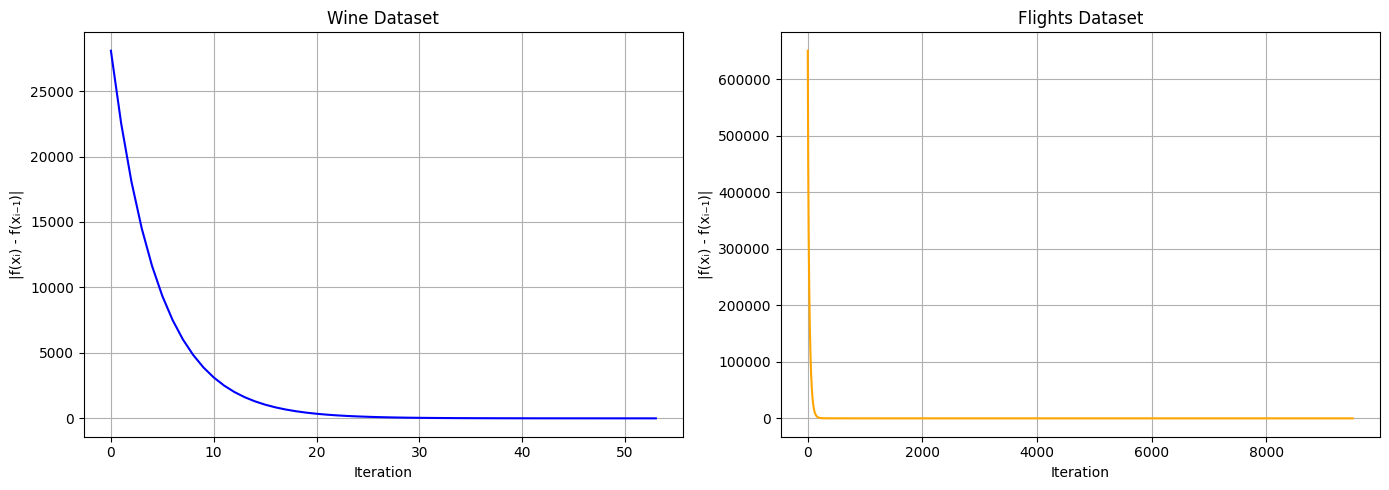

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Compute loss differences
loss_diffs_wine = [abs(losses_1[i] - losses_1[i-1]) for i in range(1, len(losses_1))]
loss_diffs_flights = [abs(losses[i] - losses[i-1]) for i in range(1, len(losses))]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot wine loss differences
axes[0].plot(loss_diffs_wine, color='blue')
axes[0].set_title("Wine Dataset")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("|f(xᵢ) - f(xᵢ₋₁)|")
axes[0].grid(True)

# Plot flights loss differences
axes[1].plot(loss_diffs_flights, color='orange')
axes[1].set_title("Flights Dataset")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("|f(xᵢ) - f(xᵢ₋₁)|")
axes[1].grid(True)

plt.tight_layout()
plt.show()


## In each iteration step, also calculate the RMSE on the test set RMSE. and, at the end of learning, plot it against the iteration number i. Explain the graph

# NOTE Below! 
### This point (1.2 - Last question - RMSE Graph comparriosn) was answered in the end of the notebook (It was Thecnicaly more easy for me)

# Part B (3 Points): Step Length for Gradient Descent

### Our Core functions for GD from eriler:

In [29]:
import inspect


def learn_linregGD(X, y, i_max, epsilon, step_func=None, step_params=None):
    """
    Learns linear regression weights using gradient descent.

    Parameters:
        X           : design matrix (N x d)
        y           : target vector (N x 1)
        i_max       : max iterations
        epsilon     : convergence threshold
        step_func   : step size function (e.g. None, armijo_step, bold_driver_step)
        step_params : dictionary of parameters for the step function

    Returns:
        beta        : learned weights
        losses      : list of loss values per iteration
        differences : list of |loss[i] - loss[i-1]| per iteration
    """
    y = y.reshape(-1, 1)

    def loss_fn(beta):
        y_pred = X @ beta
        return np.sum((y - y_pred) ** 2).item()

    def grad_fn(beta):
        return -2 * X.T @ (y - X @ beta)

    d = X.shape[1]
    beta_0 = np.zeros((d, 1))

    beta, losses, differences = minimize_GD(
        f=loss_fn,
        grad_f=grad_fn,
        x0=beta_0,
        i_max=i_max,
        epsilon=epsilon,
        step_func=step_func,
        step_params=step_params
    )

    return beta, losses, differences


def minimize_GD(f, grad_f, x0, i_max, epsilon, step_func=None, step_params=None):
    x = x0.copy()
    losses = []
    differences = []
    
    if step_params is None:
        step_params = {}

    # Default fixed alpha if not using a step_func
    alpha = step_params.get("alpha", 1e-5)
    alpha_old = alpha

    for i in range(i_max):
        d = -grad_f(x)

        # Use dynamic step function if provided
        import inspect

        if step_func is not None:
            step_params["alpha_old"] = alpha_old

            # Filter step_params to only include args accepted by the step function
            accepted_args = inspect.signature(step_func).parameters
            filtered_params = {k: v for k, v in step_params.items() if k in accepted_args}

            alpha = step_func(f, x, d, **filtered_params)
        x_new = x + alpha * d

        loss_old = f(x)
        loss_new = f(x_new)

        losses.append(loss_new)
        differences.append(abs(loss_old - loss_new))

        if abs(loss_old - loss_new) < epsilon:
            return x_new, losses, differences

        x = x_new
        alpha_old = alpha  # update for next Bold Driver step

    print(f"Final loss change: {abs(loss_old - loss_new)}")
    print("Warning: not converged in i_max iterations")
    return x, losses, differences


def armijo_step(f, x, d, delta=0.1):
    alpha = 1.0
    while f(x) - f(x + alpha * d) < alpha * delta * (d.T @ d):
        alpha /= 2
    return alpha


def bold_driver_step(f, x, d, alpha_old, alpha_plus=1.1, alpha_minus=0.5):
    alpha = alpha_old * alpha_plus
    while f(x) - f(x + alpha * d) <= 0:
        alpha *= alpha_minus
    return alpha


### For Armijo Step Size using the Flights DF

In [ ]:
step_params = {"delta": 0.1}
beta, losses, diffs = learn_linregGD(
    X_flights_train, y_flights_train,
    i_max=10000,
    epsilon=1.0,
    step_func=armijo_step,
    step_params=step_params
)

plt.plot(diffs)
plt.xlabel("Iteration")
plt.ylabel("|f(xᵢ₋₁) - f(xᵢ)|")
plt.title("Loss Decrease Per Iteration – Armijo")
plt.grid(True)
plt.show()



### For the Bold Driver step size algo - the Flights DF

In [ ]:
step_params = {
    "alpha_old": 1.0,
    "alpha_plus": 1.1,
    "alpha_minus": 0.5
}

beta_bold, losses_bold, diffs_bold = learn_linregGD(
    X_flights_train, y_flights_train,
    i_max=10000,
    epsilon=1.0,
    step_func=bold_driver_step,
    step_params=step_params
)
plt.plot(diffs_bold)
plt.xlabel("Iteration")
plt.ylabel("|f(xᵢ₋₁) - f(xᵢ)|")
plt.title("Loss Decrease Per Iteration – Bold Driver")
plt.grid(True)
plt.show()


### 1. Technical Summary: Implementing Step Size Algorithms

We implemented two dynamic step size algorithms: Armijo and Bold Driver, and integrated both into a flexible gradient descent function.

Armijo Step Length:
This strategy starts with a large step size (α = 1) and reduces it (by dividing by 2) until a condition is satisfied. The condition checks that the function value decreases sufficiently relative to the gradient direction. This helps prevent overshooting the minimum and ensures consistent progress.
We implemented it as a function armijo_step(f, x, d, delta) and passed it into the gradient descent loop.

Bold Driver Step Length:
This approach increases the step size when learning is going well (loss decreases), and shrinks it when it gets worse. It starts by increasing the previous step (α_old * α⁺), but if the loss increases, it repeatedly shrinks the step (α = α * α⁻) until improvement is seen.
We implemented this logic in bold_driver_step(f, x, d, alpha_old, alpha_plus, alpha_minus).

Integration into Gradient Descent:
We modified the minimize_GD function to accept a general step_func and a step_params dictionary. This allowed us to plug in either strategy (or none, for fixed α) using the same gradient descent function.

### 2. Explanation of the Graphs and Results

We plotted the value of |f(xᵢ₋₁) − f(xᵢ)| per iteration for both step size strategies.

Armijo:
The graph shows a sharp drop in the early iterations, followed by almost flat values close to zero. This indicates that the step size quickly adjusted to an effective level, and the function value decreased steadily until convergence. Armijo is very cautious and typically leads to stable convergence.

Bold Driver:
The graph shows an initial increase in the difference (due to aggressive step growth), followed by a rapid drop and flattening. This reflects the boldness of the algorithm—it increases α aggressively until the loss gets worse, then backs off. This behavior can make convergence faster in early stages, but also risk instability if not tuned carefully.

In both cases, the curve flattening to near zero indicates successful convergence.

### Caluclation RMSE with new Step algo

In [ ]:
def learn_linregGD(X, y, i_max, epsilon, step_func=None, step_params=None,
                   X_test=None, y_test=None):
    y = y.reshape(-1, 1)

    def loss_fn(beta):
        y_pred = X @ beta
        return np.sum((y - y_pred) ** 2).item()

    def grad_fn(beta):
        return -2 * X.T @ (y - X @ beta)

    d = X.shape[1]
    beta_0 = np.zeros((d, 1))

    beta, losses, differences, rmses = minimize_GD(
        loss_fn, grad_fn, beta_0, i_max, epsilon,
        step_func, step_params,
        X_test, y_test
    )

    return beta, losses, differences, rmses


In [ ]:
def minimize_GD(f, grad_f, x0, i_max, epsilon, step_func=None, step_params=None,
                X_test=None, y_test=None):
    import inspect
    x = x0.copy()
    losses = []
    differences = []
    rmses = []

    if step_params is None:
        step_params = {}

    alpha = step_params.get("alpha", 1e-5)
    alpha_old = alpha

    for i in range(i_max):
        d = -grad_f(x)

        if step_func is not None:
            step_params["alpha_old"] = alpha_old
            accepted_args = inspect.signature(step_func).parameters
            filtered_params = {k: v for k, v in step_params.items() if k in accepted_args}
            alpha = step_func(f, x, d, **filtered_params)

        x_new = x + alpha * d

        loss_old = f(x)
        loss_new = f(x_new)
        losses.append(loss_new)
        differences.append(abs(loss_old - loss_new))

        if X_test is not None and y_test is not None:
            y_pred = X_test @ x_new
            rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
            rmses.append(rmse)

        if abs(loss_old - loss_new) < epsilon:
            return x_new, losses, differences, rmses

        x = x_new
        alpha_old = alpha

    print(f"Final loss change: {abs(loss_old - loss_new)}")
    print("Warning: not converged in i_max iterations")
    return x, losses, differences, rmses


In [ ]:
# ---------- Armijo ----------
step_params_armijo = {"delta": 0.1}
beta_armijo, losses_armijo, diffs_armijo, rmses_armijo = learn_linregGD(
    X_flights_train, y_flights_train,
    i_max=10000,
    epsilon=1.0,
    step_func=armijo_step,
    step_params=step_params_armijo,
    X_test=X_flights_test,
    y_test=y_flights_test
)

# ---------- Bold Driver ----------
step_params_bold = {
    "alpha_old": 1.0,
    "alpha_plus": 1.1,
    "alpha_minus": 0.5
}
beta_bold, losses_bold, diffs_bold, rmses_bold = learn_linregGD(
    X_flights_train, y_flights_train,
    i_max=10000,
    epsilon=1.0,
    step_func=bold_driver_step,
    step_params=step_params_bold,
    X_test=X_flights_test,
    y_test=y_flights_test
)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Armijo RMSE
plt.subplot(1, 2, 1)
plt.plot(rmses_armijo)
plt.xlabel("Iteration")
plt.ylabel("Test RMSE")
plt.title("Test RMSE – Armijo")
plt.grid(True)

# Bold Driver RMSE
plt.subplot(1, 2, 2)
plt.plot(rmses_bold)
plt.xlabel("Iteration")
plt.ylabel("Test RMSE")
plt.title("Test RMSE – Bold Driver")
plt.grid(True)

plt.tight_layout()
plt.show()


### Summery
The two RMSE graphs compare the performance of Armijo and Bold Driver step size strategies during optimization:

Armijo Step Size (Left Graph):

Starts with a high RMSE (~100), which drops rapidly in the first ~10 iterations.

Progress slows as it stabilizes, reflecting Armijo's conservative adjustment of step size.

Provides stable but slower convergence.

Bold Driver Step Size (Right Graph):

Starts higher (~145) but drops more sharply, reaching a low RMSE within ~30–40 iterations.

Uses larger step sizes when loss decreases, leading to faster convergence.

Riskier but more aggressive than Armijo.

Conclusion:
Both methods converge to low RMSE values, but Bold Driver does so faster. Armijo is slower but more stable, making it better for complex or noisy loss landscapes.

# Note - This is the answer for:  1.2 - Last question - RMSE Graph comparriosn 

In [ ]:
# ---- STEP PARAMS for FIXED ALPHA ----
step_params_fixed = {"alpha": 0.00001}

# ---- Run for FLIGHTS ----
beta_flights, _, _, rmses_flights = learn_linregGD(
    X_flights_train, y_flights_train,
    i_max=10000,
    epsilon=1.0,
    step_func=None,  # Fixed step
    step_params=step_params_fixed,
    X_test=X_flights_test,
    y_test=y_flights_test
)

# ---- Run for WINE ----
beta_wine, _, _, rmses_wine = learn_linregGD(
    X_wine_train, y_wine_train,
    i_max=10000,
    epsilon=1.0,
    step_func=None,  # Fixed step
    step_params=step_params_fixed,
    X_test=X_wine_test,
    y_test=y_wine_test
)

# ---- PLOT SIDE BY SIDE ----
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# FLIGHTS
plt.subplot(1, 2, 1)
plt.plot(rmses_flights)
plt.xlabel("Iteration")
plt.ylabel("Test RMSE")
plt.title("Flights Dataset – Fixed Step (α=1e-5)")
plt.grid(True)

# WINE
plt.subplot(1, 2, 2)
plt.plot(rmses_wine)
plt.xlabel("Iteration")
plt.ylabel("Test RMSE")
plt.title("Wine Dataset – Fixed Step (α=1e-5)")
plt.grid(True)

plt.tight_layout()
plt.show()
